In [1]:
import numpy as np
import torch

# Load the dataset (assuming it's space-separated)
data = np.loadtxt('/home/darksst/Desktop/Fall24/StatisticalDecisionTheory/Data/Semion/semeion.data')

# Split data into features (X) and labels (Y)
X = data[:, :256]  # First 256 columns are the pixel features
Y = data[:, 256:]  # Last 10 columns represent the one-hot encoded digit labels

# Convert one-hot encoded labels to class labels (digits 0 to 9)
Y_labels = np.argmax(Y, axis=1)

# Function to split data into training and testing sets
def train_test_split_manual(X, Y, test_size=0.2, random_state=None):
    np.random.seed(random_state)  # Set seed for reproducibility if provided
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)  # Shuffle the indices
    
    test_size = int(test_size * X.shape[0])
    train_indices, test_indices = indices[:-test_size], indices[-test_size:]
    
    X_train, X_test = X[train_indices], X[test_indices]
    Y_train, Y_test = Y[train_indices], Y[test_indices]
    
    return X_train, X_test, Y_train, Y_test

# Split the data (e.g., 80% training, 20% testing)
X_train, X_test, Y_train, Y_test = train_test_split_manual(X, Y_labels, test_size=0.2, random_state=42)

# Convert NumPy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.long)  # Labels as long tensors for classification
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
Y_test_tensor = torch.tensor(Y_test, dtype=torch.long)

# Print shapes to verify
print("Training data shape:", X_train_tensor.shape)
print("Training labels shape:", Y_train_tensor.shape)
print("Test data shape:", X_test_tensor.shape)
print("Test labels shape:", Y_test_tensor.shape)


Training data shape: torch.Size([1275, 256])
Training labels shape: torch.Size([1275])
Test data shape: torch.Size([318, 256])
Test labels shape: torch.Size([318])


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Function to split data into training and testing sets
def train_test_split_manual(X, Y, test_size=0.2, random_state=None):
    np.random.seed(random_state)  # Set seed for reproducibility if provided
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)  # Shuffle the indices
    
    test_size = int(test_size * X.shape[0])
    train_indices, test_indices = indices[:-test_size], indices[-test_size:]
    
    X_train, X_test = X[train_indices], X[test_indices]
    Y_train, Y_test = Y[train_indices], Y[test_indices]
    
    return X_train, X_test, Y_train, Y_test

# Training loop function
def train_model(model, X_train, Y_train, criterion, optimizer, epochs):
    loss_history = []  # To store loss values at each epoch

    for epoch in range(epochs):
        model.train()  # Set the model to training mode

        # Forward pass: Compute predicted Y by passing X to the model
        outputs = model(X_train)

        # Compute the loss (cross-entropy loss)
        loss = criterion(outputs, Y_train)

        # Backward pass: Compute gradients
        optimizer.zero_grad()  # Clear previous gradients
        loss.backward()        # Backpropagation

        # Update parameters
        optimizer.step()

        # Store the loss for plotting
        loss_history.append(loss.item())

        # Print loss every 10 epochs
        if (epoch+1) % 100 == 0:
            print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

    return loss_history

# Function to compute accuracy
def compute_accuracy(model, X_test, Y_test):
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # Disable gradient computation for inference
        outputs = model(X_test)

    # Get predicted class (digit) from logits using argmax
    _, predicted = torch.max(outputs, 1)

    # Compute the number of correct predictions
    correct = (predicted == Y_test).sum().item()
    total = Y_test.size(0)

    # Compute accuracy
    accuracy = correct / total * 100  # Percentage

    return accuracy

# Function to plot the loss over epochs
def plot_loss(loss_history, epochs):
    plt.plot(range(epochs), loss_history)
    plt.xlabel('Epochs')
    plt.ylabel('Cross-Entropy Loss')
    plt.title('Training Loss over Epochs')
    plt.show()

Epoch 100/200, Loss: 0.43989893794059753
Epoch 200/200, Loss: 0.24524691700935364


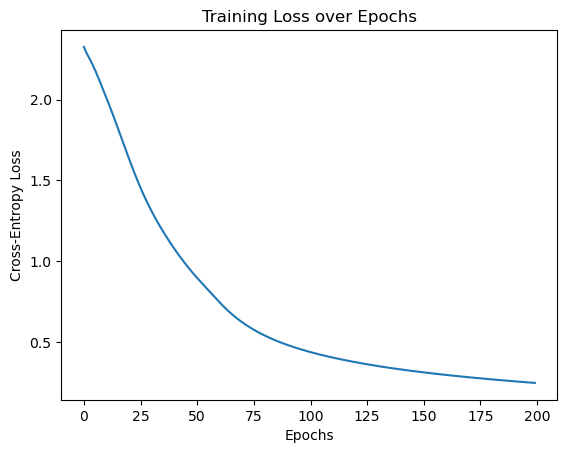

Accuracy on the test set: 86.79%


In [3]:
#MLP model with 5 neurons in the hidden layer
class MLPModel5(nn.Module):
    def __init__(self):
        super(MLPModel5, self).__init__()
        # Define layers
        self.hidden = nn.Linear(256, 5)  # Input: 256 features, Hidden layer: 5 neurons
        self.relu = nn.ReLU()            # ReLU activation for the hidden layer
        self.output = nn.Linear(5, 10)   # Output layer: 10 neurons (for digits 0–9)

    def forward(self, x):
        # Forward pass
        x = self.hidden(x)  # Pass through the hidden layer
        x = self.relu(x)     # Apply ReLU activation
        x = self.output(x)   # Output logits (no activation here)
        return x

# Initialize the model
model_5 = MLPModel5()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_5.parameters(), lr=0.25)

# Set the number of epochs
epochs = 200

# Train the model with 5 neurons in the hidden layer
loss_history_5 = train_model(model_5, X_train_tensor, Y_train_tensor, criterion, optimizer, epochs)

# Plot the loss
plot_loss(loss_history_5, epochs)

# Compute the accuracy on the test set
test_accuracy_5 = compute_accuracy(model_5, X_test_tensor, Y_test_tensor)
print(f'Accuracy on the test set: {test_accuracy_5:.2f}%')

Epoch 100/100, Loss: 0.20685401558876038


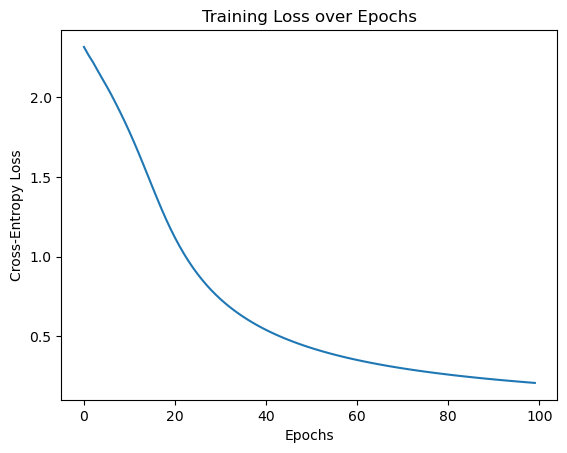

Accuracy on the test set: 91.19%


In [4]:
#MLP model with 10 neurons in the hidden layer
class MLPModel10(nn.Module):
    def __init__(self):
        super(MLPModel10, self).__init__()
        # Define layers
        self.hidden = nn.Linear(256, 10)  # Input: 256 features, Hidden layer: 10 neurons
        self.relu = nn.ReLU()             # ReLU activation for the hidden layer
        self.output = nn.Linear(10, 10)   # Output layer: 10 neurons (for digits 0–9)

    def forward(self, x):
        # Forward pass
        x = self.hidden(x)  # Pass through the hidden layer
        x = self.relu(x)     # Apply ReLU activation
        x = self.output(x)   # Output logits (no activation here)
        return x

# Reinitialize the weights and biases of the model
def reinitialize_parameters(model):
    for layer in model.children():
        if isinstance(layer, nn.Linear):
            nn.init.uniform_(layer.weight, -1/np.sqrt(layer.in_features), 1/np.sqrt(layer.in_features))
            nn.init.zeros_(layer.bias)

# Initialize the second model and reinitialize parameters
model_10 = MLPModel10()  # Create the model with 10 neurons
reinitialize_parameters(model_10)  # Reinitialize the weights and biases

# Reinitialize the optimizer for the new model
optimizer = optim.SGD(model_10.parameters(), lr=0.3)

# Set the number of epochs
epochs = 100

# Train the model with 10 neurons in the hidden layer
loss_history_10 = train_model(model_10, X_train_tensor, Y_train_tensor, criterion, optimizer, epochs)

# Plot the loss
plot_loss(loss_history_10, epochs)

# Compute the accuracy on the test set
test_accuracy_10 = compute_accuracy(model_10, X_test_tensor, Y_test_tensor)
print(f'Accuracy on the test set: {test_accuracy_10:.2f}%')

Epoch 100/500, Loss: 1.3400380611419678
Epoch 200/500, Loss: 0.9102157950401306
Epoch 300/500, Loss: 0.5251314043998718
Epoch 400/500, Loss: 0.4289269745349884
Epoch 500/500, Loss: 0.23790177702903748


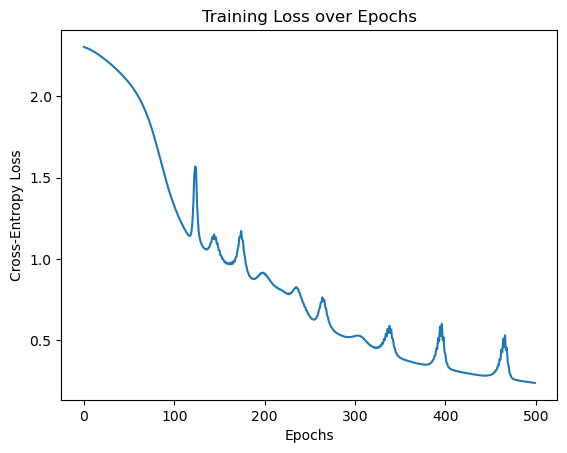

Accuracy on the test set: 80.50%


In [5]:
# Define the MLP model with 2 hidden layers, each with 5 neurons
class MLPModelTwoHiddenLayers(nn.Module):
    def __init__(self):
        super(MLPModelTwoHiddenLayers, self).__init__()
        # Define layers
        self.hidden1 = nn.Linear(256, 5)  # First hidden layer: 5 neurons
        self.relu1 = nn.ReLU()            # ReLU activation for the first hidden layer
        self.hidden2 = nn.Linear(5, 5)    # Second hidden layer: 5 neurons
        self.relu2 = nn.ReLU()            # ReLU activation for the second hidden layer
        self.output = nn.Linear(5, 10)    # Output layer: 10 neurons (for digits 0–9)

    def forward(self, x):
        # Forward pass
        x = self.hidden1(x)  # Pass through the first hidden layer
        x = self.relu1(x)     # Apply ReLU activation
        x = self.hidden2(x)   # Pass through the second hidden layer
        x = self.relu2(x)     # Apply ReLU activation
        x = self.output(x)    # Output logits (no activation here)
        return x

# Reinitialize the weights and biases of the model
def reinitialize_parameters(model):
    for layer in model.children():
        if isinstance(layer, nn.Linear):
            nn.init.uniform_(layer.weight, -1/np.sqrt(layer.in_features), 1/np.sqrt(layer.in_features))
            nn.init.zeros_(layer.bias)

# Initialize the model with 2 hidden layers, each with 5 neurons
model_two_hidden_layers = MLPModelTwoHiddenLayers()
reinitialize_parameters(model_two_hidden_layers)  # Reinitialize the parameters

# Reinitialize the optimizer for the new model
optimizer = optim.SGD(model_two_hidden_layers.parameters(), lr=0.132)

# Set the number of epochs
epochs = 500

# Train the model with 2 hidden layers, each with 5 neurons
loss_history_two_hidden_layers = train_model(model_two_hidden_layers, X_train_tensor, Y_train_tensor, criterion, optimizer, epochs)

# Plot the loss
plot_loss(loss_history_two_hidden_layers, epochs)

# Compute the accuracy on the test set
test_accuracy_two_hidden_layers = compute_accuracy(model_two_hidden_layers, X_test_tensor, Y_test_tensor)
print(f'Accuracy on the test set: {test_accuracy_two_hidden_layers:.2f}%')

In [6]:
#MODEL with 5 neurons and 1 hidden layer converges at around 60 epochs
#MODEL with 10 neurons and 1 hidden layer converges at around 30 epochs
#MODEL with 5 neurons at 2 hidden layer converges at arouund 190 epochs